In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [6]:
# Define a function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Define a function for the Moving Average Crossover strategy
def moving_average_crossover_strategy(data, short_window=40, long_window=100):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['Close']
    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   
    signals['positions'] = signals['signal'].diff()

    return signals

# Define a function to plot the stock data and signals
def plot_signals(signals):
    plt.figure(figsize=(14, 7))
    plt.plot(signals['price'], label='Close Price', alpha=0.5)
    plt.plot(signals['short_mavg'], label='40-Day Moving Average', alpha=0.75)
    plt.plot(signals['long_mavg'], label='100-Day Moving Average', alpha=0.75)

    # Plot Buy signals
    plt.plot(signals[signals['positions'] == 1.0].index,
             signals['short_mavg'][signals['positions'] == 1.0],
             '^', markersize=10, color='g', lw=0, label='Buy Signal')

    # Plot Sell signals
    plt.plot(signals[signals['positions'] == -1.0].index,
             signals['short_mavg'][signals['positions'] == -1.0],
             'v', markersize=10, color='r', lw=0, label='Sell Signal')

    plt.title('Stock Price and Moving Averages')
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed
C:\Users\natha\AppData\Local\Temp\ipykernel_5988\1332967588.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_

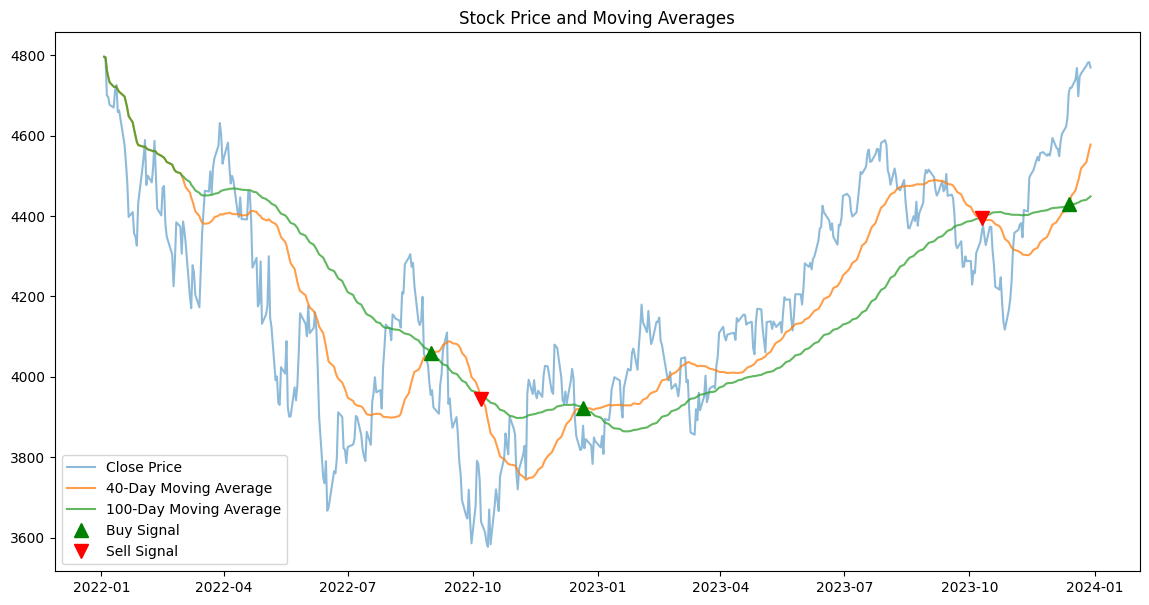

In [7]:
# Example usage
ticker = '^GSPC'  # Example ticker symbol
start_date = '2022-01-01'
end_date = '2024-01-01'

data = fetch_stock_data(ticker, start_date, end_date)
signals = moving_average_crossover_strategy(data)
plot_signals(signals)